<a href="https://colab.research.google.com/github/ArtemKarDev/Kaggle/blob/main/EDA_Netflix_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix - развивающийся популярный стриминговый сервис. 

Проведем разведочный анализ данных с использованием интерактивной библиотеки визулизации данных - Plotly. <br>
Построим рекомендательную систему

Визуальный анализ данных 
1. Анализ набора данных Netflix
2. Составление системы рекомендаций для пользователей (Content based filtering)

In [147]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

Загрузил датасет с https://www.kaggle.com/datasets/shivamb/netflix-shows
к себе на google-диск 

In [148]:
# загружаем датасет в ноутбус с моего google-диска
!wget 'https://drive.google.com/uc?id=1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL' -O netflix_titles.csv


--2022-08-01 15:53:20--  https://drive.google.com/uc?id=1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL
Resolving drive.google.com (drive.google.com)... 142.250.141.113, 142.250.141.138, 142.250.141.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hgb5vk6b2cv6vngbklkm4eagde6mnhqi/1659369150000/00838955718561688027/*/1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL?uuid=4589f93f-d921-4c81-a572-687ea4f5aa72 [following]
--2022-08-01 15:53:21--  https://doc-08-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hgb5vk6b2cv6vngbklkm4eagde6mnhqi/1659369150000/00838955718561688027/*/1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL?uuid=4589f93f-d921-4c81-a572-687ea4f5aa72
Resolving doc-08-14-docs.googleusercontent.com (doc-08-14-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc

In [149]:
netflix_overall = pd.read_csv('netflix_titles.csv')
netflix_overall.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3385,s3386,TV Show,"Breakfast, Lunch & Dinner",NaN,"David Chang, Seth Rogen, Chrissy Teigen, Lena ...",United States,"October 23, 2019",2019,TV-MA,1 Season,Docuseries,Chef David Chang takes his insatiable curiosit...
6514,s6515,TV Show,Cold Case Files Classic,NaN,Bill Kurtis,United States,"September 15, 2020",1999,TV-MA,1 Season,"Crime TV Shows, Docuseries",Through forensic science and criminal psycholo...
3349,s3350,Movie,The Old Thieves: The Legend of Artegios,Everardo González,NaN,Mexico,"November 1, 2019",2007,TV-MA,97 min,"Documentaries, International Movies","While carrying out prison sentences, five noto..."
857,s858,TV Show,The Neighbor,NaN,"Quim Gutiérrez, Clara Lago, Adrián Pino, Catel...",Spain,"May 21, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...",Self-centered Javier's life gets a bit messy w...
4430,s4431,TV Show,Creators,NaN,"Fabio Aste, Héctor Segura, Sebastian Rosas",Argentina,"November 1, 2018",2015,TV-Y,2 Seasons,"Kids' TV, Spanish-Language TV Shows",Two brilliant scientists discover the hidden v...
6532,s6533,TV Show,Cooking on High,NaN,"Josh Leyva, Ngaio Bealum",United States,"June 22, 2018",2018,TV-MA,1 Season,Reality TV,In the first-ever competitive cannabis cooking...
8264,s8265,Movie,The Damned Rain,Satish Manwar,"Sonali Kulkarni, Girish Kulkarni, Jyoti Subhas...",India,"January 1, 2018",2009,TV-14,99 min,"Dramas, International Movies",An optimistic farmer is determined to succeed ...
3066,s3067,TV Show,Mia and Me,NaN,"Rosabell Laurenti Sellers, Adrian Moore, Saphi...","Netherlands, Germany, Italy, Canada","January 1, 2020",2017,TV-Y7,2 Seasons,Kids' TV,A mysterious gift from her late parents sends ...
569,s570,Movie,Dreamy Eyes,Victor Vu,"Tran Nghia, Truc Anh, Tran Phong, Khanh Van, N...",Vietnam,"July 1, 2021",2019,TV-14,117 min,"Dramas, International Movies, Romantic Movies","Through heartbreak and betrayal, Ngan's unrequ..."
1115,s1116,Movie,Ferrari Ki Sawaari,Rajesh Mapuskar,"Sharman Joshi, Boman Irani, Ritwik Sahore, Par...",India,"April 1, 2021",2012,TV-PG,133 min,"Comedies, International Movies, Sports Movies",A father winds up involved with a stolen Ferra...


In [150]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


наблюдаем наличие пропусков в некоторых колонках, но для разведки это не кретично.

In [151]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show'].copy()

netflix_movie = netflix_overall[netflix_overall['type'] == 'Movie'].copy()

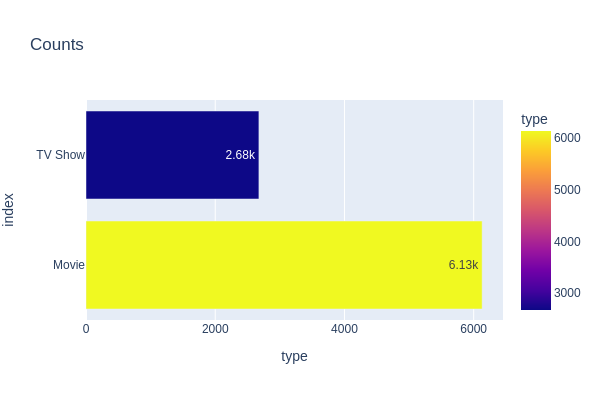

In [152]:
netflix_counts = netflix_overall['type'].value_counts()

fig = px.bar(netflix_counts, x="type", color='type', title="Counts", text_auto='.3s')
fig.update_layout(autosize=False, width=600, height=400)
fig.show('png')


Количество фильмов на Netflix больше чем сериалов более чем в 2 раза

### Длительность видеоконтента

In [153]:
topdirs = pd.value_counts(netflix_overall['duration'])
topdirs.head(10)

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: duration, dtype: int64

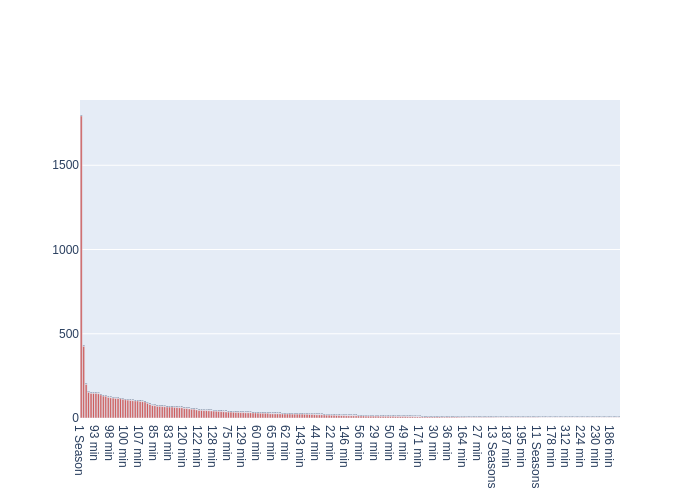

In [154]:
from plotly import graph_objects as go

fig = go.Figure([ 
      go.Bar(x=topdirs.index, 
             y=topdirs.values, 
             text=topdirs.values, 
             marker_color='indianred'
             ) 
      ])

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show('png')

Длительность в таблице указана в текстовом формате. Чаще всего указывается длительность - 'Season', тоесть Сезон - для твшоу(сериалов). но мы же знаем что фильмов больше, да - но длительность фильмов очень сильно вариативна.

# Анализ фильмов

## Какой месяц, самый перспективный для релиза контента?
вычислим месяц с наименьшим количеством публикуемого контента - для наименьшей конкуренции за зрителя

In [155]:
# проверим есть ли пропуски в датах публикации фильма
netflix_overall.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [156]:
# дропнем записи с пустой датой публикации
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [157]:
# посмотрим что получилось
netflix_date.sample(5)

,date_added
5365,"August 1, 2017"
3968,"March 29, 2019"
628,"June 29, 2021"
3750,"June 14, 2019"
6341,"December 3, 2018"


из этой записи необходимо выделить год и месяц - добавим их в новые столбцы

In [158]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [159]:
# посмотрим на самые ранние добавления фильмов
netflix_date.sort_values(by=['year','month']).head()

,date_added,year,month
6611,"February 4, 2008",2008,February
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
6885,"October 8, 2013",2013,October
7908,"October 14, 2013",2013,October


Интересно - между первой и второй публикацией фильмов 5 лет - видимо в этот период пуликовали только сериалы.

In [160]:
# для сортировки по месяцу сделаем споком месяцев
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] #[::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
January,0.0,0.0,0.0,0.0,28.0,14.0,24.0,37.0,53.0,36.0
February,1.0,0.0,1.0,1.0,6.0,17.0,24.0,45.0,42.0,44.0
March,0.0,1.0,0.0,2.0,3.0,38.0,35.0,53.0,44.0,37.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0


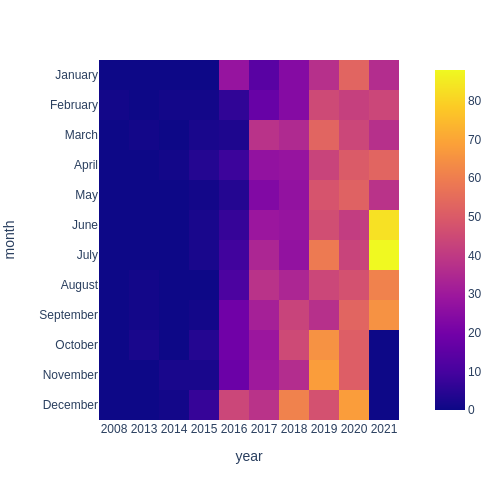

In [161]:
fig = px.imshow(df,width=500, height=500)
fig.show('png')

С помощью plotly  очень просто визуализировать. Всё параметры применилиь автоматически - видим по самой яркой точке - июль 2021го самый "жаркий" месяц по публикациям фильмов.<br>
Но нам наиболее интересен наоборот самый холодный месяц - например январь несколько лет подряд в этот месяц наименьшее количество публикаций, но в связи с праздниками и длинными ввыходнымидолжно быть наибольшее количество просмотров. Но в США с 3го января уже начинают работать. Будем целиться на Российский сегмент зрителей.

## Рейтинги фильмов


исследуем взрасной рейтинг фильмов

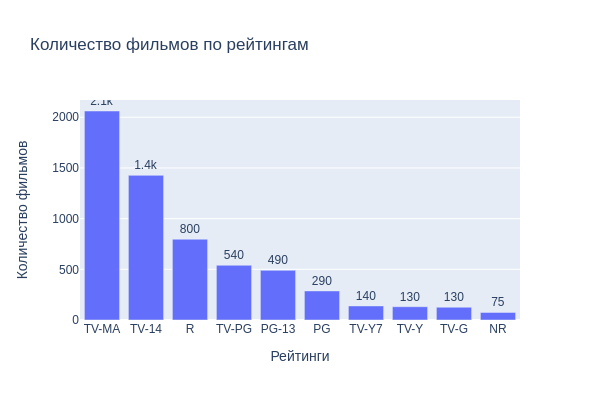

In [162]:
fig = go.Figure([ 
      go.Bar(y=netflix_movie['rating'].value_counts(), 
             x=netflix_movie['rating'].value_counts().index[:10], 
             text=netflix_movie['rating'].value_counts().values
             ) 
      ])

fig.update_layout(#legend_orientation="h",
                  #legend=dict(x=.5, xanchor="center"),
                  title="Количество фильмов по рейтингам",
                  xaxis_title="Рейтинги",
                  yaxis_title="Количество фильмов",
                  #margin=dict(l=0, r=0, t=30, b=0),
                  width=600, height=400)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside')
fig.show('png')

1. ТV-МА - Самая большая группа. Такой рейтинг дается фильмам только для взрослой аудитории.
2. ТV-14 - Вторая группа по величине. Контент фильма с таким рейтингом не подходит для детей младше 14 лет.
3. R - Фильмы не подходят для просмотра детям до 17 лет.

## Анализ года выпуска фильма

In [163]:
df_release = netflix_movie['release_year'].value_counts()[:15]

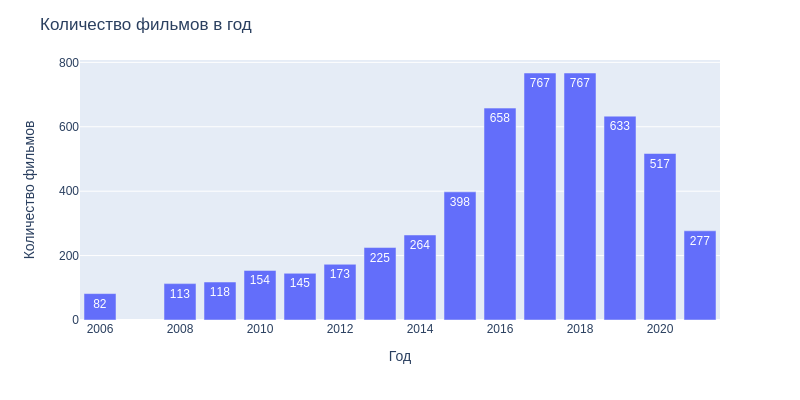

In [164]:
fig = px.bar(y=df_release.values, 
             x=df_release.index, 
             text=df_release.values)
fig.update_layout(title="Количество фильмов в год",
                  xaxis_title="Год",
                  yaxis_title="Количество фильмов",
                  width=800, height=400)
fig.show('png')

2017 и 2018 самый частый год выпуска фильмов

## Топ 10 стран по выпуску фильмов

In [165]:
#  проверим на пропуски 
netflix_movie.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

в колонке "страна" - есть пропуски  - но  не будем избовляться от этих записей - заполним значением Unknow

In [166]:
netflix_movie['country'].fillna("Unknow", inplace=True)
netflix_movie.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [167]:
netflix_movie['country'].value_counts()

United States                            2058
India                                     893
Unknow                                    440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

В некоторых записях есть перечень стран учавствовавших в создании фильма - 

In [202]:
# функция для получения количества упоминаний 

def get_counts(data):    # соберем все записи из колонки и передаём списком в функцию
  lst = []
  
  for i in data:           # пройдемся по этому списку
    i = list(i.split(',')) # разделим по запятым
    for j in i:
      lst.append(j.replace(' ',''))  # уберем пробелы если есть
      # for k in lst:   # теперь пройдемся по разделенным записям
      #   if k in list(l.keys()):  # и будем добавлять или увеличивать счетчик при наличии страны в словаре
      #       l[k] += 1
      #   else:
      #       l[k] = 1
  l = Counter(lst)
  return sorted(l.items(), key=lambda item: l[item[0]], reverse=True)


In [206]:
  # функция для визуализации данных
def get_graph_counts(data, title,xlabel,ylabel):

    names = [name for name, values in data]
    values = [values for name, values in data]

    fig = px.bar(x=names, 
                y=values, 
                text=values)
    fig.update_layout(title=title,
                      xaxis_title=xlabel,
                      yaxis_title=ylabel,
                      width=800, height=400)
    fig.show('png')

In [204]:
countries_fin = get_counts(list(netflix_movie['country']))[:10]
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknow', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

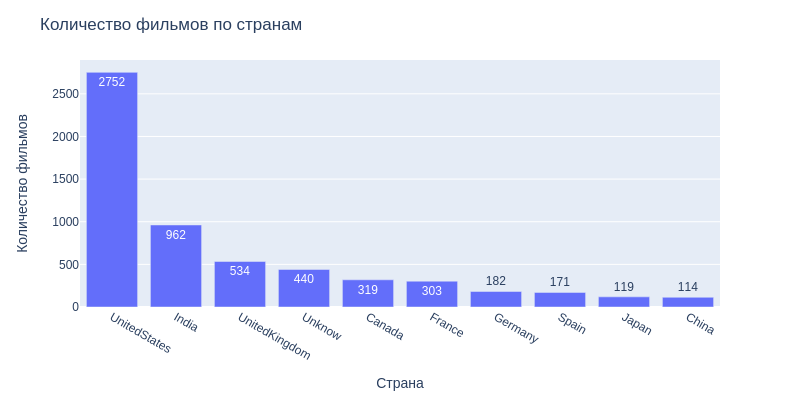

In [207]:
get_graph_counts(countries_fin, "Количество фильмов по странам", "Страна", "Количество фильмов")

## Анализ продолжительноси фильмов


In [170]:
netflix_movie['duration'].value_counts().head()

90 min    152
94 min    146
93 min    146
97 min    146
91 min    144
Name: duration, dtype: int64

In [172]:
netflix_movie[netflix_movie['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


есть несколько пропусков заполним их модой

In [171]:
mode_min = netflix_movie['duration'].mode()
netflix_movie.loc[netflix_movie['duration'].isna(), "duration"] = mode_min[0]

преобразуем тип значений для отрисовки частотности

In [173]:
# удалим слово min
netflix_movie['duration'] = netflix_movie['duration'].str.replace(' min', '')
# оставшиеся цифры переведем в int
netflix_movie['duration'] = netflix_movie['duration'].astype(int)
netflix_movie['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int64

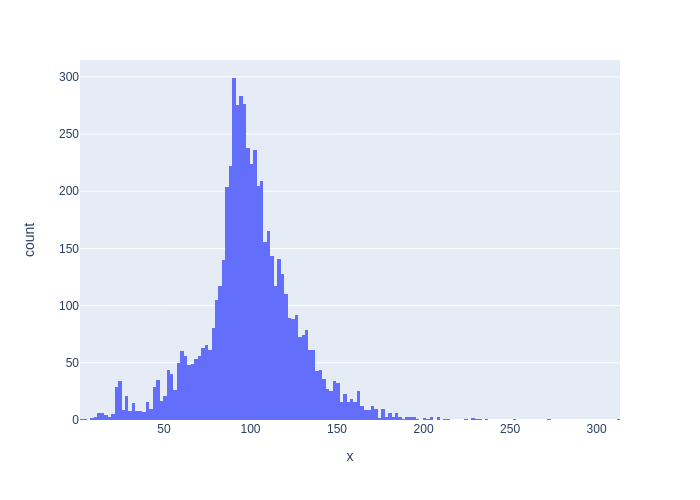

In [174]:
fig = px.histogram(x=netflix_movie['duration'])
fig.show('png')

Большинство фильмов имеют длительность от 75 до 120 минут

## Анализ жанров

In [176]:
netflix_movie['listed_in'].sample(10)

5309        Dramas, International Movies, Romantic Movies
6779                                             Comedies
6160                       Comedies, Dramas, LGBTQ Movies
159                Comedies, Dramas, International Movies
7610                                        Documentaries
1674    Action & Adventure, Comedies, International Mo...
4830                         Dramas, International Movies
4509          Dramas, International Movies, Sports Movies
2781    Independent Movies, International Movies, Thri...
2582                   Children & Family Movies, Comedies
Name: listed_in, dtype: object

Посчитаем упоминания всех жанров 

In [209]:
genres = get_counts(list(netflix_movie['listed_in']))[:10]

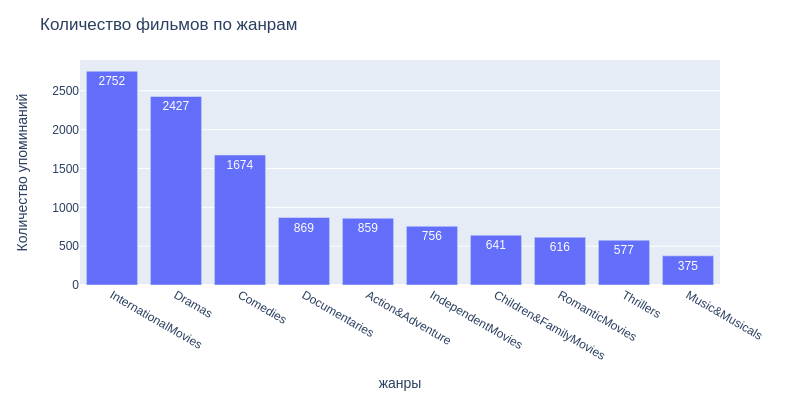

In [210]:
get_graph_counts(genres, "Количество фильмов по жанрам", "жанры", "Количество упоминаний")

Анализ стран, выпускающих сериалы

In [186]:
netflix_shows['country'].isna().sum()

391

In [187]:
netflix_shows['country'].fillna('Unknow', inplace=True)

In [189]:
netflix_shows['country'].value_counts()

United States                                    760
Unknow                                           391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

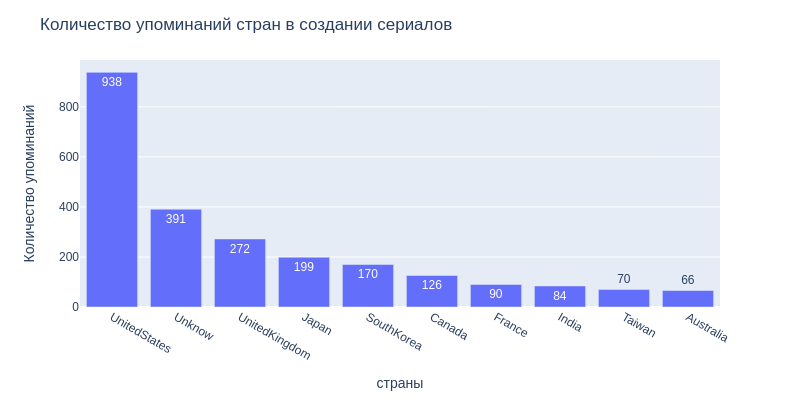

In [215]:
countries = get_counts(list(netflix_shows['country']))[:10]
get_graph_counts(countries, "Количество упоминаний стран в создании сериалов", "страны", "Количество упоминаний")

Индия со второго места по фильмам ушла на 8 место по сериалам

Сериалы с большим количеством сезонов

In [218]:
features = ['title','duration']
durations = netflix_shows[features]
durations[:5]

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season


In [ ]:
durations['no_of_seasons'] = durations['duration'].str.replace(' Season','')
durations

durations['no_of_seasons']
durations

durations['no_of_seasons'].str.replace('s', '')

durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int)
durations

t = ['title', 'no_of_seasons' ]
top = durations[t]

top = top. sort_values(by='no_of_seasons', ascending=False)